In [56]:
import sys
import os
sys.path.append('/home/yutanagano/Projects/tcr_embedder')
os.chdir('/home/yutanagano/Projects/tcr_embedder')

In [57]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn

seaborn.set_theme()
seaborn.set_style('white')

In [58]:
BENCHMARKING_PARENT_DIR = Path('benchmarks')

In [59]:
metric_dicts = []

for model in BENCHMARKING_PARENT_DIR.iterdir():
    with open(model/'metrics.json', 'r') as f:
        metric_dicts.append(json.load(f))

In [60]:
metrics = pd.DataFrame(metric_dicts)
metrics = metrics.sort_values(by='model_name', ignore_index=True)

In [61]:
metrics

,model_name,alignment,uniformity,5nn_accuracy
0,CDR3BERT_c_6_128_8_512-embed_1,0.419170,-0.823908,0.546539
1,CDR3BERT_c_6_128_8_512-embed_2,0.570118,-1.149718,0.568019
2,CDR3BERT_c_6_128_8_512-embed_3,0.628573,-1.257691,0.527446
3,CDR3BERT_c_6_128_8_512-embed_4,0.698350,-1.446142,0.575179
4,CDR3BERT_c_6_128_8_512-embed_5,0.459114,-0.940823,0.541766
5,CDR3BERT_c_6_128_8_512-embed_6,0.471255,-0.956358,0.548926
6,CDR3BERT_cp_6_128_8_512-embed_1,0.149922,-0.319260,0.587112
7,CDR3BERT_cp_6_128_8_512-embed_2,0.144002,-0.308512,0.575179
8,CDR3BERT_cp_6_128_8_512-embed_3,0.174616,-0.357159,0.558473
9,CDR3BERT_cp_6_128_8_512-embed_4,0.226792,-0.458028,0.517900


In [62]:

def collapse_names(name):
    groups = (
        'random_embedder',
        'UnsupSimCTE_CDR3BERT_cp',
        'SupSimCTE_CDR3BERT_cp',
        'CDR3BERT_cp',
        'CDR3BERT_c'
    )

    for group in groups:
        if group in name:
            return group
    
    return name

metrics['model_name'] = metrics['model_name'].map(collapse_names)

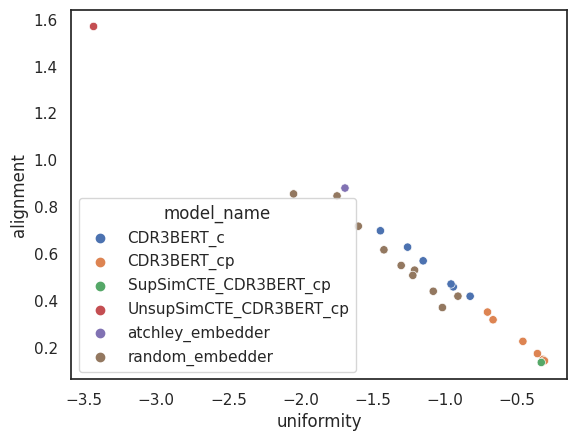

In [63]:
scatter_model_names = seaborn.scatterplot(metrics, x='uniformity', y='alignment', hue='model_name')
plt.show()

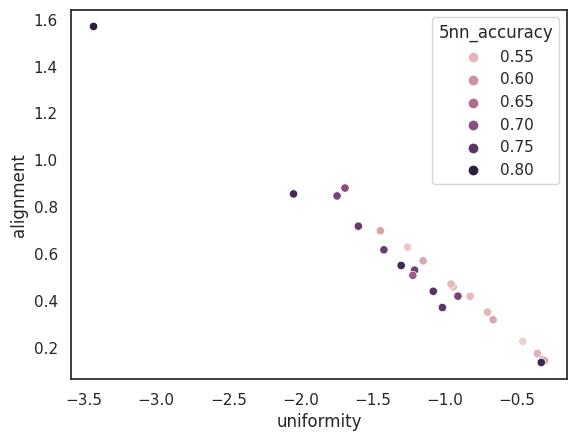

In [64]:
scatter_5nn_accs = seaborn.scatterplot(metrics, x='uniformity', y='alignment', hue='5nn_accuracy')
plt.show()